In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to your zip file
zip_path = '/content/drive/My Drive/[HSS407] Final project/florida.zip'

# Destination folder where the contents will be extracted
destination_folder = '/content/drive/My Drive/[HSS407] Final project/florida'

# Create the destination folder if it doesn't already exist
os.makedirs(destination_folder, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print("Files extracted successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files extracted successfully!


In [ ]:
# Path to your zip file
zip_path = '/content/drive/My Drive/[HSS407] Final project/kaggle.zip'

# Destination folder where the contents will be extracted
destination_folder = '/content/drive/My Drive/[HSS407] Final project/kaggle'

# Create the destination folder if it doesn't already exist
os.makedirs(destination_folder, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print("Files extracted successfully!")

Files extracted successfully!


In [ ]:
cd '/content/drive/My Drive/[HSS407] Final project'

/content/drive/My Drive/[HSS407] Final project


In [ ]:
!ls

 florida   florida.zip	'[HSS407] Poster.ipynb'   kaggle   kaggle.zip   output.csv


In [ ]:
cd /kaggle

/kaggle


In [ ]:
import pandas as pd

# Load the CSV file
data_path = '/content/drive/My Drive/[HSS407] Final project/output.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and the summary of the dataframe
data_head = data.head()
data_info = data.info()

data_head, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62545 entries, 0 to 62544
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   nb_comment  62545 non-null  int64 
 1   nb_likes    62545 non-null  int64 
 2   text        62257 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


(   nb_comment  nb_likes                                               text
 0           7       203  Got my notes and scripts ready for our qualify...
 1          10       579  🍇Blackberry Limeade🍹Protein Cake Bars are the ...
 2           5       321  #TBT \nRemembering my first day in 2010 when @...
 3           1        25  Enter now to win all 5 of our amazing VIP swag...
 4           2        26  Went to help out in Monkeys kindergarten class...,
 None)

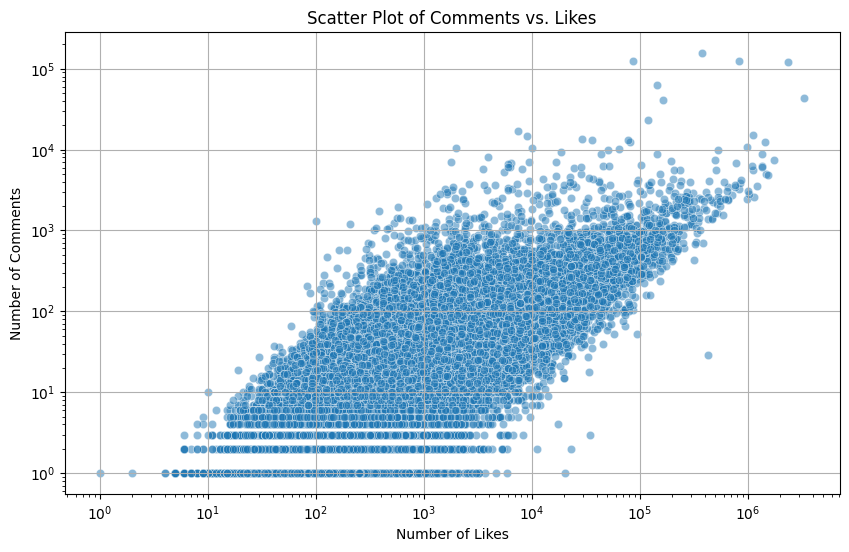

(None,
             nb_likes  nb_comment
 nb_likes    1.000000    0.380136
 nb_comment  0.380136    1.000000)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the relationship between nb_likes and nb_comment
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['nb_likes'], y=data['nb_comment'], alpha=0.5)
plt.title('Scatter Plot of Comments vs. Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Comments')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

# Calculating the Pearson correlation coefficient
correlation = data[['nb_likes', 'nb_comment']].corr()

plt.show(), correlation


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import download
download('vader_lexicon')  # Ensure the VADER lexicon is downloaded

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def calculate_sentiment(text):
    if pd.isna(text):
        return None  # Return None for missing text entries
    return sia.polarity_scores(text)['compound']  # Return the compound score

# Apply sentiment analysis to the text column
data['sentiment_score'] = data['text'].apply(calculate_sentiment)

# Display the first few entries with sentiment scores
data[['nb_likes', 'nb_comment', 'text', 'sentiment_score']].head(), data['sentiment_score'].describe()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


(   nb_likes  nb_comment                                               text  \
 0       203           7  Got my notes and scripts ready for our qualify...   
 1       579          10  🍇Blackberry Limeade🍹Protein Cake Bars are the ...   
 2       321           5  #TBT \nRemembering my first day in 2010 when @...   
 3        25           1  Enter now to win all 5 of our amazing VIP swag...   
 4        26           2  Went to help out in Monkeys kindergarten class...   
 
    sentiment_score  
 0           0.3612  
 1           0.9451  
 2           0.8906  
 3           0.9710  
 4           0.8122  ,
 count    62257.000000
 mean         0.480100
 std          0.458604
 min         -0.995800
 25%          0.000000
 50%          0.623900
 75%          0.895400
 max          0.999300
 Name: sentiment_score, dtype: float64)

In [ ]:
# from textblob import TextBlob

# # Function to calculate sentiment score using TextBlob
# def calculate_sentiment_tb(text):
#     if pd.isna(text):
#         return None  # Return None for missing text entries
#     return TextBlob(text).sentiment.polarity  # Return the polarity score

# # Apply sentiment analysis to the text column using TextBlob
# data['sentiment_score_tb'] = data['text'].apply(calculate_sentiment_tb)

# # Display the first few entries with sentiment scores and calculate correlation with likes and comments
# sentiment_likes_corr = data['sentiment_score_tb'].corr(data['nb_likes'])
# sentiment_comments_corr = data['sentiment_score_tb'].corr(data['nb_comment'])

# data[['nb_likes', 'nb_comment', 'text', 'sentiment_score_tb']].head(), sentiment_likes_corr, sentiment_comments_corr


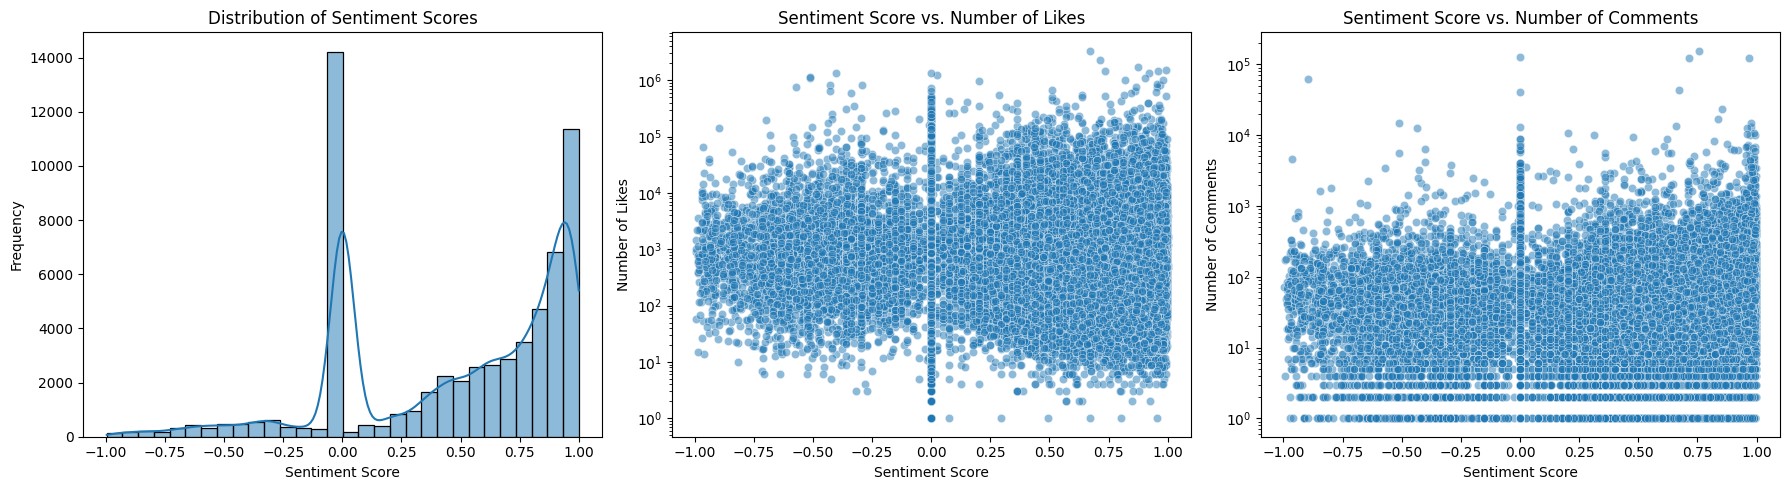

In [ ]:
# Plotting the distribution of sentiment scores and scatter plots with likes and comments
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram of sentiment scores
sns.histplot(data['sentiment_score'].dropna(), ax=axes[0], bins=30, kde=True)
axes[0].set_title('Distribution of Sentiment Scores')
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Frequency')

# Sentiment Score vs. Number of Likes
sns.scatterplot(x=data['sentiment_score'], y=data['nb_likes'], ax=axes[1], alpha=0.5)
axes[1].set_title('Sentiment Score vs. Number of Likes')
axes[1].set_xlabel('Sentiment Score')
axes[1].set_ylabel('Number of Likes')
axes[1].set_yscale('log')

# Sentiment Score vs. Number of Comments
sns.scatterplot(x=data['sentiment_score'], y=data['nb_comment'], ax=axes[2], alpha=0.5)
axes[2].set_title('Sentiment Score vs. Number of Comments')
axes[2].set_xlabel('Sentiment Score')
axes[2].set_ylabel('Number of Comments')
axes[2].set_yscale('log')

plt.tight_layout()
plt.show()


Some BS codes

In [ ]:
# Install textblob for sentiment analysis
!pip install textblob

# Import necessary libraries
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return None

# Apply sentiment analysis
data['sentiment_polarity'] = data['text'].apply(calculate_sentiment)

# Display basic statistics of sentiment polarity and a preview of this column
sentiment_stats = data['sentiment_polarity'].describe()
data[['text', 'sentiment_polarity']].head(), sentiment_stats


(                                                text  sentiment_polarity
 0  Got my notes and scripts ready for our qualify...            0.200000
 1  🍇Blackberry Limeade🍹Protein Cake Bars are the ...            0.316458
 2  #TBT \nRemembering my first day in 2010 when @...            0.415000
 3  Enter now to win all 5 of our amazing VIP swag...            0.800000
 4  Went to help out in Monkeys kindergarten class...            0.125000,
 count    62545.000000
 mean         0.222730
 std          0.255632
 min         -1.000000
 25%          0.000000
 50%          0.201936
 75%          0.382937
 max          1.000000
 Name: sentiment_polarity, dtype: float64)

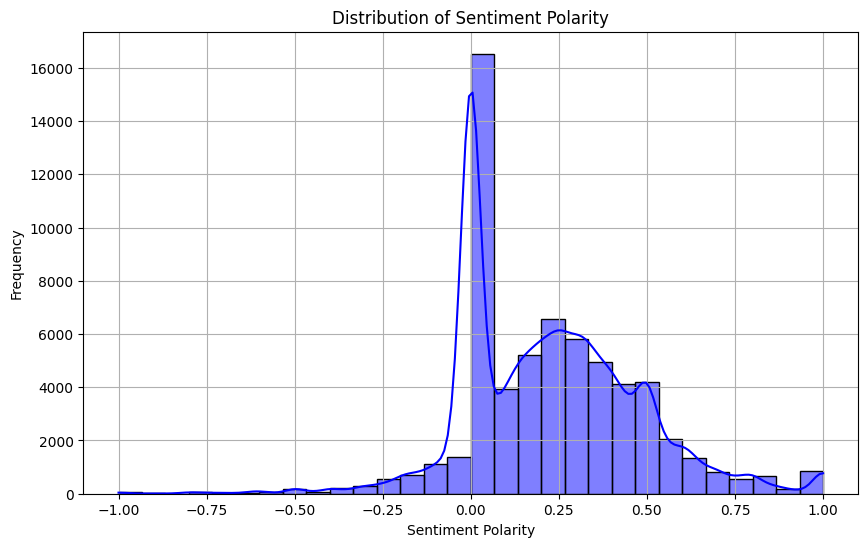

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment_polarity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
import emoji

# Function to extract emojis from text
def extract_emojis(text):
    return ''.join(c for c in str(text) if c in emoji.UNICODE_EMOJI['en'])

# Apply function to extract emojis
data['emojis'] = data['text'].apply(extract_emojis)

# Count the frequency of each emoji
emoji_counts = data['emojis'].str.cat(sep=' ')
emoji_counts = pd.Series(list(emoji_counts)).value_counts()

# Show the most common emojis and their counts
emoji_counts.head(10)


AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

In [ ]:
# Install emoji library
!pip install emoji

# Retry importing emoji library
import emoji

# Function to extract emojis from text
def extract_emojis(text):
    return ''.join(c for c in str(text) if c in emoji.UNICODE_EMOJI['en'])

# Apply function to extract emojis
data['emojis'] = data['text'].apply(extract_emojis)

# Count the frequency of each emoji
emoji_counts = data['emojis'].str.cat(sep=' ')
emoji_counts = pd.Series(list(emoji_counts)).value_counts()

# Show the most common emojis and their counts
emoji_counts.head(10)


ERROR: Operation cancelled by user


AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

In [ ]:
import emoji

# Function to extract emojis from text
def extract_emojis(text):
    return ''.join(c for c in str(text) if c in emoji.EMOJI_DATA)

# Apply function to extract emojis
data['emojis'] = data['text'].apply(extract_emojis)

# Count the frequency of each emoji
emoji_counts = data['emojis'].str.cat(sep=' ')
emoji_counts = pd.Series(list(emoji_counts)).value_counts()

# Display the top 10 emojis
emoji_top_10 = emoji_counts.head(10)
print(emoji_top_10)


     62544
✨     8164
❤     7129
🏼     6873
🏻     6470
😍     6387
🙌     4031
💕     3826
♀     3767
😂     3223
Name: count, dtype: int64


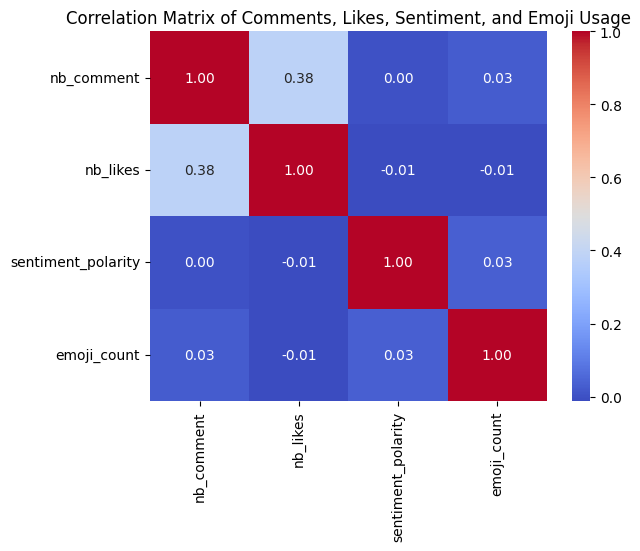

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming emoji count is a feature we're interested in
data['emoji_count'] = data['emojis'].apply(len)

# Compute correlation matrix
correlation_matrix = data[['nb_comment', 'nb_likes', 'sentiment_polarity', 'emoji_count']].corr()

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Comments, Likes, Sentiment, and Emoji Usage")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data['text'].dropna())  # Dropping NA to ensure text data is clean

# Fit LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(dtm)

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Displaying topics
display_topics(lda_model, vectorizer.get_feature_names_out(), 10)


Topic 0:
di la il le ich und che et vous die
Topic 1:
que palette makeup anastasiabeverlyhills en la foundation lashes el lipstick
Topic 2:
love new day time like just ad ve use today
Topic 3:
giveaway recipe food ad chocolate like delicious make link just
Topic 4:
liketoknow http liketk liketkit shop app ootd outfit look fashion


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features and target variable
X = data[['sentiment_polarity', 'emoji_count']]  # Adding emoji count as a feature
y = data['nb_likes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 738743605.4306259
R^2 Score: 0.0007067790775174831


NEW ERA!

In [ ]:
import pandas as pd

# Load the dataset to understand its structure and contents
dataset_path = '/content/drive/My Drive/[HSS407] Final project/output.csv'
data = pd.read_csv(dataset_path)

# Display basic information about the dataset and the first few rows to get an overview
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62545 entries, 0 to 62544
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   nb_comment  62545 non-null  int64 
 1   nb_likes    62545 non-null  int64 
 2   text        62257 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


(None,
    nb_comment  nb_likes                                               text
 0           7       203  Got my notes and scripts ready for our qualify...
 1          10       579  🍇Blackberry Limeade🍹Protein Cake Bars are the ...
 2           5       321  #TBT \nRemembering my first day in 2010 when @...
 3           1        25  Enter now to win all 5 of our amazing VIP swag...
 4           2        26  Went to help out in Monkeys kindergarten class...)

In [ ]:
import pandas as pd
from collections import Counter
import re

def extract_hashtags(text):
    return re.findall(r"#(\w+)", str(text))

data['hashtags'] = data['text'].apply(extract_hashtags)
all_hashtags = sum(data['hashtags'], [])
hashtag_counts = Counter(all_hashtags)
top_hashtags = pd.DataFrame(hashtag_counts.most_common(20), columns=['Hashtag', 'Frequency'])
data['top_hashtag_used'] = data['hashtags'].apply(lambda x: any(item in top_hashtags['Hashtag'].values for item in x))
grouped_data = data.groupby('top_hashtag_used').agg({'nb_likes': 'mean', 'nb_comment': 'mean'}).reset_index()


In [ ]:
from textblob import TextBlob

def calculate_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

data['sentiment'] = data['text'].apply(calculate_sentiment)
data['sentiment_category'] = pd.cut(data['sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['negative', 'neutral', 'positive'])
sentiment_analysis = data.groupby('sentiment_category').agg({'nb_likes': 'mean', 'nb_comment': 'mean'}).reset_index()


In [ ]:
data

,nb_comment,nb_likes,text,sentiment_score,sentiment_polarity,emojis,emoji_count,hashtags,top_hashtag_used,sentiment,sentiment_category
0,7,203,Got my notes and scripts ready for our qualify...,0.3612,0.200000,,0,"[usga, usopen, itshere]",False,0.200000,positive
1,10,579,🍇Blackberry Limeade🍹Protein Cake Bars are the ...,0.9451,0.316458,🍇🍹👌✌,4,"[Serious, njstramfam]",False,0.316458,positive
2,5,321,#TBT \nRemembering my first day in 2010 when @...,0.8906,0.415000,,0,"[TBT, TeamAsics, TeamFrederick, Sponsored, Ath...",False,0.415000,positive
3,1,25,Enter now to win all 5 of our amazing VIP swag...,0.9710,0.800000,,0,"[VegasMommyMeetup, the411mommas]",False,0.800000,positive
4,2,26,Went to help out in Monkeys kindergarten class...,0.8122,0.125000,,0,"[lemonade, teachers, teachergift, volunteer, t...",False,0.125000,positive
...,...,...,...,...,...,...,...,...,...,...,...
62540,349,3950,-\n🍃 Roshe Run Hyperfuse\n🍂 @enchanted_inc\n-\...,0.3008,-0.041667,🍃🍂😂,3,[],False,-0.041667,negative
62541,0,14,#Repost from @youfoodz ・・・\nDid someone say br...,0.4090,0.309801,😍🍳🚛🍃,4,"[Repost, JoinTheFamily, NeverEatFrozenAgain, E...",False,0.309801,positive
62542,0,5,@GigiHadid looking gorgeous in a golden @micha...,0.7906,0.433333,,0,"[cfda, cfdaawards, gigihadid, michaelkors, red...",True,0.433333,positive
62543,2,82,"Yes, please! Thanks, @sandhillwines @winebcdot...",0.8016,0.200000,,0,[howweroam],False,0.200000,positive


In [ ]:
# saving the dataframe
data.to_csv('/content/data_updated.csv')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Assuming hashtags are already extracted and in list format in the 'hashtags' column
vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
X = vectorizer.fit_transform(data['hashtags']).toarray()

# Generate a co-occurrence matrix
Xc = (X.T @ X)  # @ denotes matrix multiplication
np.fill_diagonal(Xc, 0)

# Clustering hashtags based on their co-occurrence matrix using Agglomerative Clustering
similarity_matrix = cosine_similarity(Xc)
clustering = AgglomerativeClustering(n_clusters=10, affinity='precomputed', linkage='average')
labels = clustering.fit_predict(1 - similarity_matrix)

# Mapping hashtags to their clusters
hashtag_names = vectorizer.get_feature_names()
hashtag_cluster = dict(zip(hashtag_names, labels))


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
features = data[['sentiment_score', 'emoji_count']]  # add more features as needed
target = data['nb_likes']

# Handle missing values if necessary
features.fillna(features.mean(), inplace=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Display coefficients
print(f'Model Coefficients: {model.coef_}')


Mean Squared Error: 1114818658.726995
Model Coefficients: [-1618.73784012   -77.46295946]


<ipython-input-49-2c2baf3e5364>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace=True)


Until here, should be good. After that, idk BS BS BS!

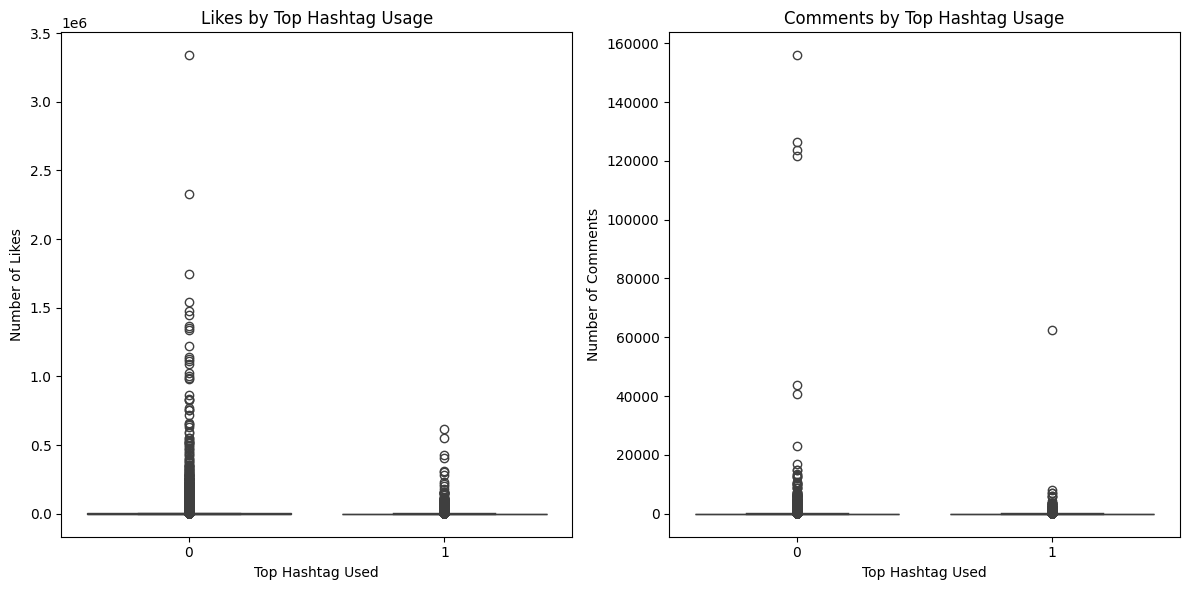

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data_copy = data.copy()

# Convert 'top_hashtag_used' to an integer for easier analysis
data_copy['top_hashtag_used'] = data_copy['top_hashtag_used'].astype(int)

# Plotting engagement metrics for posts with and without top hashtags
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='top_hashtag_used', y='nb_likes', data=data_copy)
plt.title('Likes by Top Hashtag Usage')
plt.xlabel('Top Hashtag Used')
plt.ylabel('Number of Likes')

plt.subplot(1, 2, 2)
sns.boxplot(x='top_hashtag_used', y='nb_comment', data=data_copy)
plt.title('Comments by Top Hashtag Usage')
plt.xlabel('Top Hashtag Used')
plt.ylabel('Number of Comments')
plt.tight_layout()
plt.show()


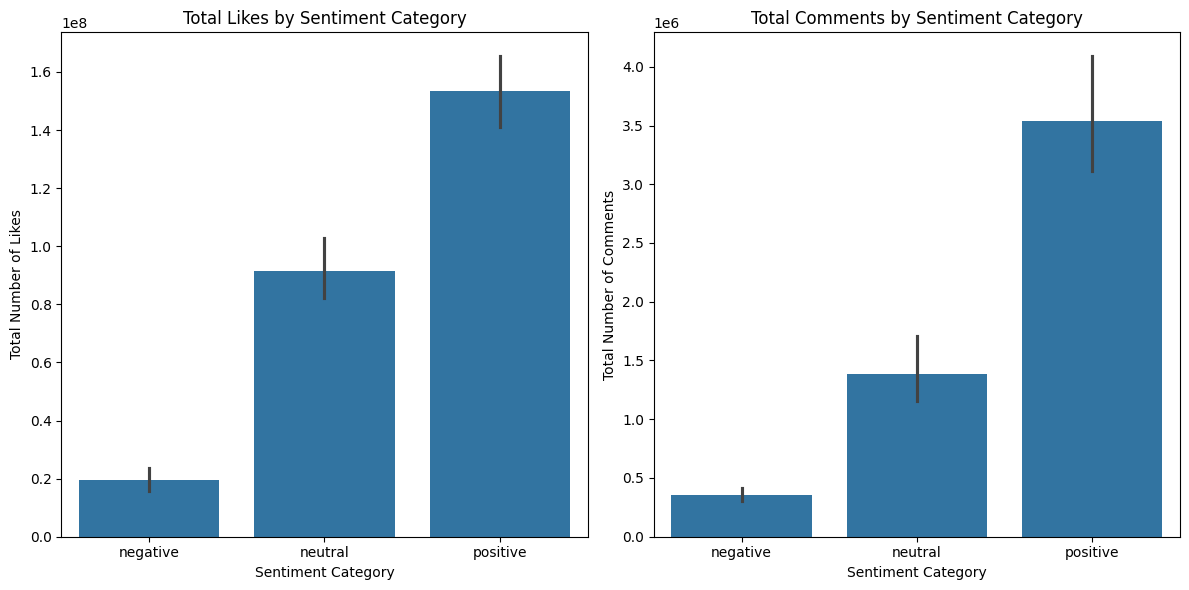

In [ ]:
# Plotting engagement metrics by sentiment category
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='sentiment_category', y='nb_likes', data=data, estimator=sum)
plt.title('Total Likes by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Total Number of Likes')

plt.subplot(1, 2, 2)
sns.barplot(x='sentiment_category', y='nb_comment', data=data, estimator=sum)
plt.title('Total Comments by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Total Number of Comments')
plt.tight_layout()
plt.show()


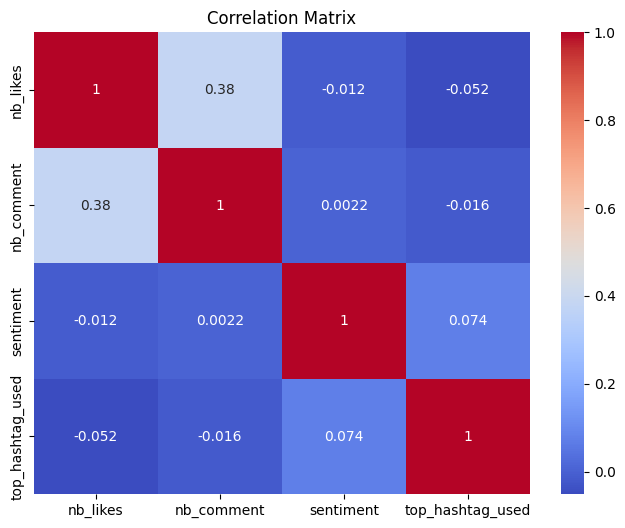

In [ ]:
# Calculating and visualizing the correlation matrix
correlation_matrix = data[['nb_likes', 'nb_comment', 'sentiment', 'top_hashtag_used']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
features = data[['sentiment_score', 'emoji_count']]  # add more features as needed
target = data['nb_likes']

# Handle missing values if necessary
features.fillna(features.mean(), inplace=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Display coefficients
print(f'Model Coefficients: {model.coef_}')


KeyError: "None of [Index(['sentiment_score', 'emoji_count'], dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data_trial = pd.read_csv('/content/drive/My Drive/[HSS407] Final project/output.csv')

# Extract hashtags and create a list of sets
data_trial['hashtags'] = data_trial['text'].apply(lambda x: set(re.findall(r"#(\w+)", x)))

# Create a co-occurrence matrix
all_hashtags = set.union(*data_trial['hashtags'])
co_occurrence_matrix = pd.DataFrame(index=all_hashtags, columns=all_hashtags).fillna(0)

for hashtags in data_trial['hashtags']:
    for (tag1, tag2) in combinations(hashtags, 2):
        co_occurrence_matrix.at[tag1, tag2] += 1
        co_occurrence_matrix.at[tag2, tag1] += 1

# Using clustering on the co-occurrence matrix to find groups
distances = 1 / (1 + co_occurrence_matrix)
np.fill_diagonal(distances.values, 0)  # We replace diagonal with zeros to ignore self-similarity in clustering

kmeans = KMeans(n_clusters=5, random_state=0).fit(distances)
tags_cluster = {tag: cluster for tag, cluster in zip(distances.columns, kmeans.labels_)}

# Map the clusters back to the original posts
data_trial['cluster'] = data_trial['hashtags'].apply(lambda tags: {tags_cluster[tag] for tag in tags if tag in tags_cluster})

# Analyze the average likes by cluster
cluster_likes = data_trial.explode('cluster').groupby('cluster')['nb_likes'].mean()

# Visualization
sns.barplot(x=cluster_likes.index, y=cluster_likes.values)
plt.title('Average Likes by Hashtag Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Likes')
plt.show()


TypeError: expected string or bytes-like object